# Logistic Regression for Customer churn Prediction
This script uses Logistic Regression to predict Customer churn based on various features such as tenure, age, income etc., using a Customer dataset.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss,recall_score, f1_score
from sklearn import preprocessing


In [38]:
# Load the Customer Churn dataset
churn_df = pd.read_csv('D:\\Learning\\IBM Data Science\\Data\\ChurnData.csv')

# Select relevant features and target variable
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'callcard', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
print("Churn Dataframe shape:", churn_df.shape)

# Prepare features (X) and target (y) variable
X = churn_df.iloc[:, :-1].to_numpy()  # Features: all columns except 'churn'
print("Features values:", X[0:5])

y = churn_df.iloc[:, -1].to_numpy()   # Target: 'churn' column
print("Target values:", y[0:5])

Churn Dataframe shape: (200, 10)
Features values: [[ 11.  33.   7. 136.   5.   5.   0.   1.   1.]
 [ 33.  33.  12.  33.   2.   0.   0.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.   0.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.   1.   1.]
 [  7.  35.  14.  80.   2.  15.   0.   0.   1.]]
Target values: [1 1 0 0 0]


In [39]:
# Standardize the features for better model performance
X_norm = StandardScaler().fit(X).transform(X)
print("Normalized features values:", X_norm[0:5])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Normalized features values: [[-1.13518441 -0.62595491 -0.4588971   0.4751423   1.6961288  -0.58477841
  -0.85972695  1.56469673  0.64686916]
 [-0.11604313 -0.62595491  0.03454064 -0.32886061 -0.6433592  -1.14437497
  -0.85972695 -0.63910148 -1.54590766]
 [-0.57928917 -0.85594447 -0.261522   -0.35227817 -1.42318853 -0.92053635
  -0.85972695 -0.63910148 -1.54590766]
 [ 0.11557989 -0.47262854 -0.65627219  0.00679109 -0.6433592  -0.02518185
   1.16316     1.56469673  0.64686916]
 [-1.32048283 -0.47262854  0.23191574  0.03801451 -0.6433592   0.53441472
  -0.85972695 -0.63910148  0.64686916]]
Training set shape: (160, 9) (160,)
Testing set shape: (40, 9) (40,)


In [ ]:
# Train the Logistic Regression model
LR = LogisticRegression(random_state=42, class_weight='balanced').fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = LR.predict(X_test)
print("Predicted values:", y_pred[0:10])

y_prob = LR.predict_proba(X_test)
print("Predicted probabilities:\n", y_prob[0:10])

Predicted values: [0 1 0 0 0 1 0 1 1 0]
Predicted probabilities:
 [[0.58236732 0.41763268]
 [0.08907644 0.91092356]
 [0.85051256 0.14948744]
 [0.81222712 0.18777288]
 [0.74775455 0.25224545]
 [0.14058143 0.85941857]
 [0.95446291 0.04553709]
 [0.27953899 0.72046101]
 [0.46167517 0.53832483]
 [0.93621012 0.06378988]]


In [41]:
# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred): .4f}")
print(f"Recall Score: {recall_score(y_test, y_pred): .4f}")
print(f"F1 Score: {f1_score(y_test, y_pred): .4f}")
print(f"Log Loss: {log_loss(y_test, y_prob): .4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.7750
Recall Score:  0.5556
F1 Score:  0.5263
Log Loss:  0.4109
Confusion Matrix:
 [[26  5]
 [ 4  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.50      0.56      0.53         9

    accuracy                           0.78        40
   macro avg       0.68      0.70      0.69        40
weighted avg       0.78      0.78      0.78        40



True Negatives: 26 False Positives: 5
False Negatives: 4 True Positives: 5


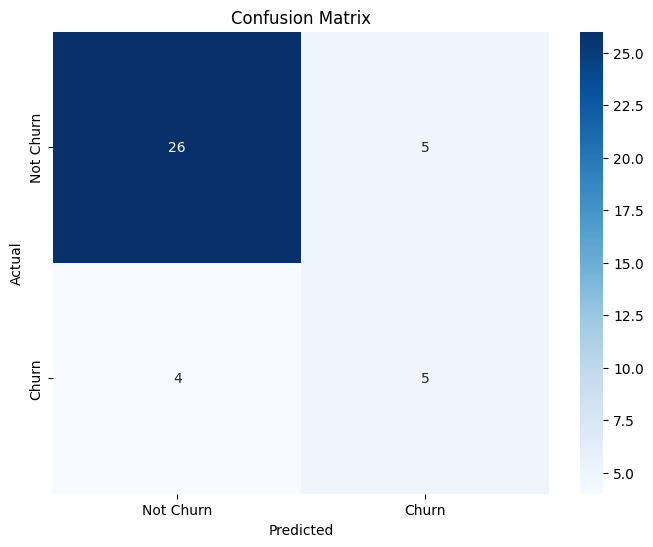

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(f"True Negatives: {cm[0, 0]} False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]} True Positives: {cm[1, 1]}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Model Coefficients:
 tenure     -0.503839
age        -0.419874
address     0.229187
income      0.113335
ed          0.270184
employ     -0.608887
equip       0.235146
wireless    0.504289
callcard   -0.435937
dtype: float64


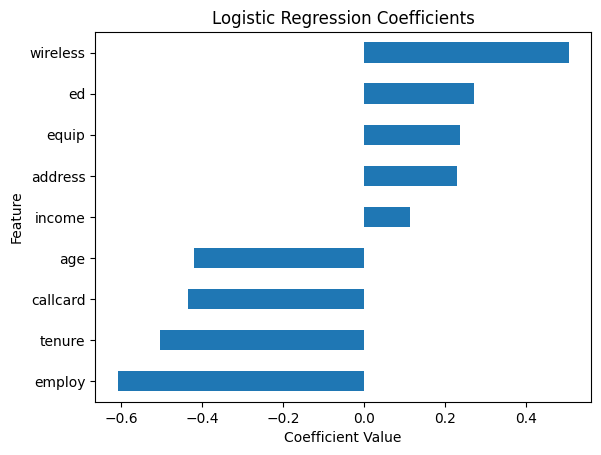

In [43]:
coffiecients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
print("Model Coefficients:\n", coffiecients)

coffiecients.sort_values().plot(kind='barh')
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()